## Assignment 2

### Implementing Feedforward neural networks with Keras and TensorFlow

### a. Import the necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### b. Load the training and testing data (MNIST/CIFAR10)

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Length of training dataset 

In [4]:
len(x_train)

60000

#### Length of testing dataset 

In [5]:
len(x_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### To see our first image 

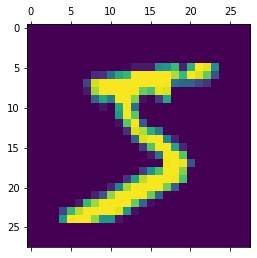

In [8]:
plt.matshow(x_train[0])

In [9]:
y_train[0]

5

#### Normalize the images 

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### c. Define the network architecture using Keras

In [12]:
model = keras.Sequential([
    keras.layers.Flatten( input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax' )
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### d. Train the model using SGD

#### Compile the model 

In [14]:
model.compile (
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#### Train the model 

In [50]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6493 - accuracy: 0.8353 - val_loss: 0.3586 - val_accuracy: 0.9026
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3344 - accuracy: 0.9061 - val_loss: 0.2911 - val_accuracy: 0.9175
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2853 - accuracy: 0.9196 - val_loss: 0.2601 - val_accuracy: 0.9263
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9281 - val_loss: 0.2347 - val_accuracy: 0.9321
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2324 - accuracy: 0.9346 - val_loss: 0.2170 - val_accuracy: 0.9388
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2145 - accuracy: 0.9394 - val_loss: 0.2010 - val_accuracy: 0.9431
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1993 - accuracy: 0.9439 - val_loss: 0.1895 - val_accuracy

### e. Evaluate the network

In [55]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss : %.2f" %test_loss)
print("Accuracy : %.2f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1621 - accuracy: 0.9515
Loss : 0.16
Accuracy : 0.95


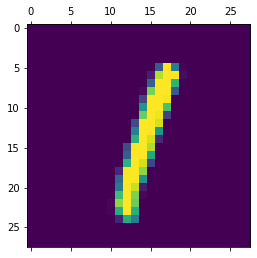

In [58]:
plt.matshow(x_test[5])

### f. Plot the training loss and accuracy

In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

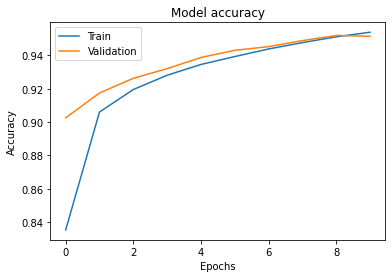

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'] )
plt.show()

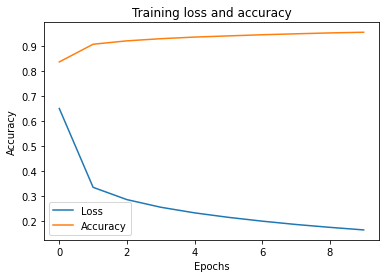

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title("Training loss and accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Loss', 'Accuracy'])
plt.show()

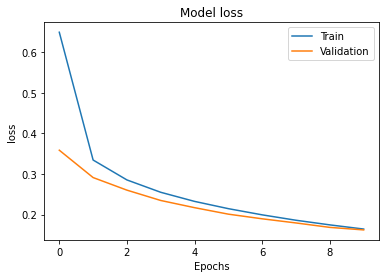

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(['Train', 'Validation'] )
plt.show()

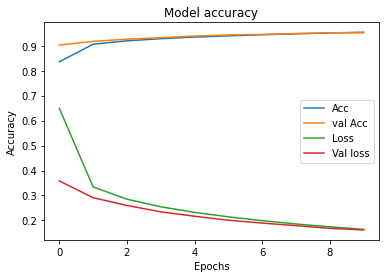

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Acc', 'val Acc','Loss', 'Val loss'] )
plt.show()